In [42]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
%matplotlib inline

In [43]:
data = pd.read_csv("D://datasetfilm.csv")
print ("Bentuk Dataset: ", data.shape)
# take a look at the dataset
data.head()

Bentuk Dataset:  (232, 14)


,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
0,13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0
1,22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0
2,3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0
3,300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0
4,A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0


In [44]:
data.isna().any()

Movie                  True
Year                   True
Ratings                True
Genre                  True
Gross                  True
Budget                 True
Screens                True
Sequel                 True
Sentiment              True
Views                  True
Likes                  True
Dislikes               True
Comments               True
Aggregate Followers    True
dtype: bool

In [45]:
print ("Bentuk dataset sebelum di cleaning: ", data.size)

data[[ 'Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel','Sentiment', 'Views', 'Dislikes', 'Comments', 
      'Aggregate Followers']] = data[[ 'Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel', 'Sentiment', 
                                      'Views', 'Dislikes', 'Comments', 'Aggregate Followers']]

data = data.dropna()
data = data.reset_index(drop=True)
print ("Bentuk dataset setelah di cleaning: ", data.size)
data.isna().any()

Bentuk dataset sebelum di cleaning:  3248
Bentuk dataset setelah di cleaning:  2618


Movie                  False
Year                   False
Ratings                False
Genre                  False
Gross                  False
Budget                 False
Screens                False
Sequel                 False
Sentiment              False
Views                  False
Likes                  False
Dislikes               False
Comments               False
Aggregate Followers    False
dtype: bool

In [46]:
data.nunique()

Movie                  187
Year                     2
Ratings                 45
Genre                   10
Gross                  178
Budget                  91
Screens                175
Sequel                   7
Sentiment               33
Views                  187
Likes                  185
Dislikes               171
Comments               178
Aggregate Followers    181
dtype: int64

In [47]:
data.describe()

,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers
count,187.000000,187.000000,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000,187.000000,1.870000e+02
mean,2014.288770,6.426203,5.240642,7.764694e+07,5.384437e+07,2334.256684,1.438503,2.844920,3.931377e+06,12993.967914,718.245989,1828.925134,3.145585e+06
std,0.454407,0.998067,4.136236,9.389921e+07,5.710069e+07,1441.311007,1.057596,7.171667,4.744584e+06,28912.866628,1315.221831,3478.140661,4.974639e+06
min,2014.000000,3.100000,1.000000,2.470000e+03,7.000000e+04,2.000000,1.000000,-38.000000,6.980000e+02,1.000000,0.000000,0.000000,1.066000e+03
25%,2014.000000,5.850000,1.000000,1.700000e+07,1.212500e+07,775.500000,1.000000,0.000000,7.787455e+05,2197.000000,131.000000,315.500000,1.744000e+05
50%,2014.000000,6.500000,3.000000,4.700000e+07,3.000000e+07,2872.000000,1.000000,0.000000,2.554307e+06,6772.000000,378.000000,885.000000,1.174806e+06
75%,2015.000000,7.100000,8.000000,1.015000e+08,7.000000e+07,3438.000000,1.000000,5.500000,5.220720e+06,15949.500000,750.500000,2101.500000,4.030950e+06
max,2015.000000,8.700000,15.000000,6.430000e+08,2.500000e+08,4324.000000,7.000000,29.000000,3.262678e+07,370552.000000,13960.000000,38363.000000,3.103000e+07


In [48]:
featureset = data[['Ratings', 'Genre', 'Gross', 'Budget', 'Screens', 'Sequel','Sentiment', 'Views', 'Dislikes', 'Comments', 'Aggregate Followers']]

In [49]:
from sklearn.preprocessing import MinMaxScaler
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[5.71428571e-01, 5.00000000e-01, 1.03577381e-05, 1.57244028e-02,
        9.94909764e-03, 0.00000000e+00, 5.67164179e-01, 1.00528320e-01,
        3.04441261e-02, 1.65784741e-02, 3.60609875e-02],
       [7.14285714e-01, 0.00000000e+00, 2.98597617e-01, 1.99775937e-01,
        7.64460898e-01, 1.66666667e-01, 5.97014925e-01, 1.78566043e-02,
        4.36962751e-03, 4.84842166e-03, 3.97981252e-01],
       [5.53571429e-01, 0.00000000e+00, 4.77412876e-02, 1.11751290e-01,
        6.64044424e-01, 0.00000000e+00, 5.67164179e-01, 9.32269522e-03,
        2.43553009e-03, 1.22513881e-03, 1.55317614e-02],
       [5.71428571e-01, 0.00000000e+00, 1.64849047e-01, 4.39843156e-01,
        8.02406293e-01, 1.66666667e-01, 5.67164179e-01, 1.38606599e-02,
        9.45558739e-03, 1.53794020e-02, 1.82711401e-02],
       [2.85714286e-01, 5.00000000e-01, 2.69013942e-02, 1.37238427e-02,
        5.34012031e-01, 1.66666667e-01, 5.67164179e-01, 9.63914451e-02,
        4.36962751e-02, 2.82042593e-02, 6.19658413e-

In [50]:
import scipy
leng = feature_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

In [51]:
import pylab
import scipy.cluster.hierarchy
Z = hierarchy.linkage(D, 'complete')

C:\Users\L\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([ 7, 14, 15, 14,  6, 13,  8, 13, 11, 16,  5, 22, 13, 26,  7,  7,  9,
       20,  4, 13,  8, 15,  8, 18, 18,  7, 21, 14, 15, 15, 10, 15, 18, 15,
       24, 15,  9,  8, 16, 12, 18,  7, 14,  7, 20,  4,  9, 18, 15, 15, 17,
       13,  7, 14, 25,  5,  7, 18,  7, 13,  5, 20, 14, 15, 10, 26,  6, 17,
       15, 21, 13, 21, 24, 10, 15, 12, 10, 14, 15,  6, 15, 13, 13, 13,  9,
        7,  9, 13, 16, 13, 18,  9, 24, 10, 15, 26,  1,  7,  8,  8,  2,  9,
        6,  3,  9, 13,  4, 10,  5,  9, 15, 15,  7, 13, 15, 23,  7,  7,  8,
        4, 11, 14, 19,  7, 13,  7,  8,  9,  8, 15,  7,  2,  7,  3,  3,  2,
       20, 16, 13, 19, 10,  1, 13, 16, 19, 13, 16, 14, 10, 20, 13, 19, 13,
       26, 14, 13, 13, 17, 17, 21, 16, 15, 15, 15,  4,  6, 15, 13,  7, 15,
       15,  6, 25,  4, 13, 13,  6,  6, 15, 13, 13, 15,  7, 23,  9,  9,  9],
      dtype=int32)

In [53]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([2, 3, 3, 3, 2, 3, 2, 3, 3, 4, 2, 5, 3, 5, 2, 2, 2, 5, 2, 3, 2, 3,
       2, 4, 4, 2, 5, 3, 3, 3, 3, 3, 4, 3, 5, 3, 2, 2, 4, 3, 4, 2, 3, 2,
       5, 2, 2, 4, 3, 3, 4, 3, 2, 3, 5, 2, 2, 4, 2, 3, 2, 5, 3, 3, 3, 5,
       2, 4, 3, 5, 3, 5, 5, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3,
       4, 3, 4, 2, 5, 3, 3, 5, 1, 2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 3, 2, 2,
       3, 3, 2, 3, 3, 5, 2, 2, 2, 2, 3, 3, 4, 2, 3, 2, 2, 2, 2, 3, 2, 1,
       2, 1, 1, 1, 5, 4, 3, 4, 3, 1, 3, 4, 4, 3, 4, 3, 3, 5, 3, 4, 3, 5,
       3, 3, 3, 4, 4, 5, 4, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 5, 2, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 5, 2, 2, 2], dtype=int32)

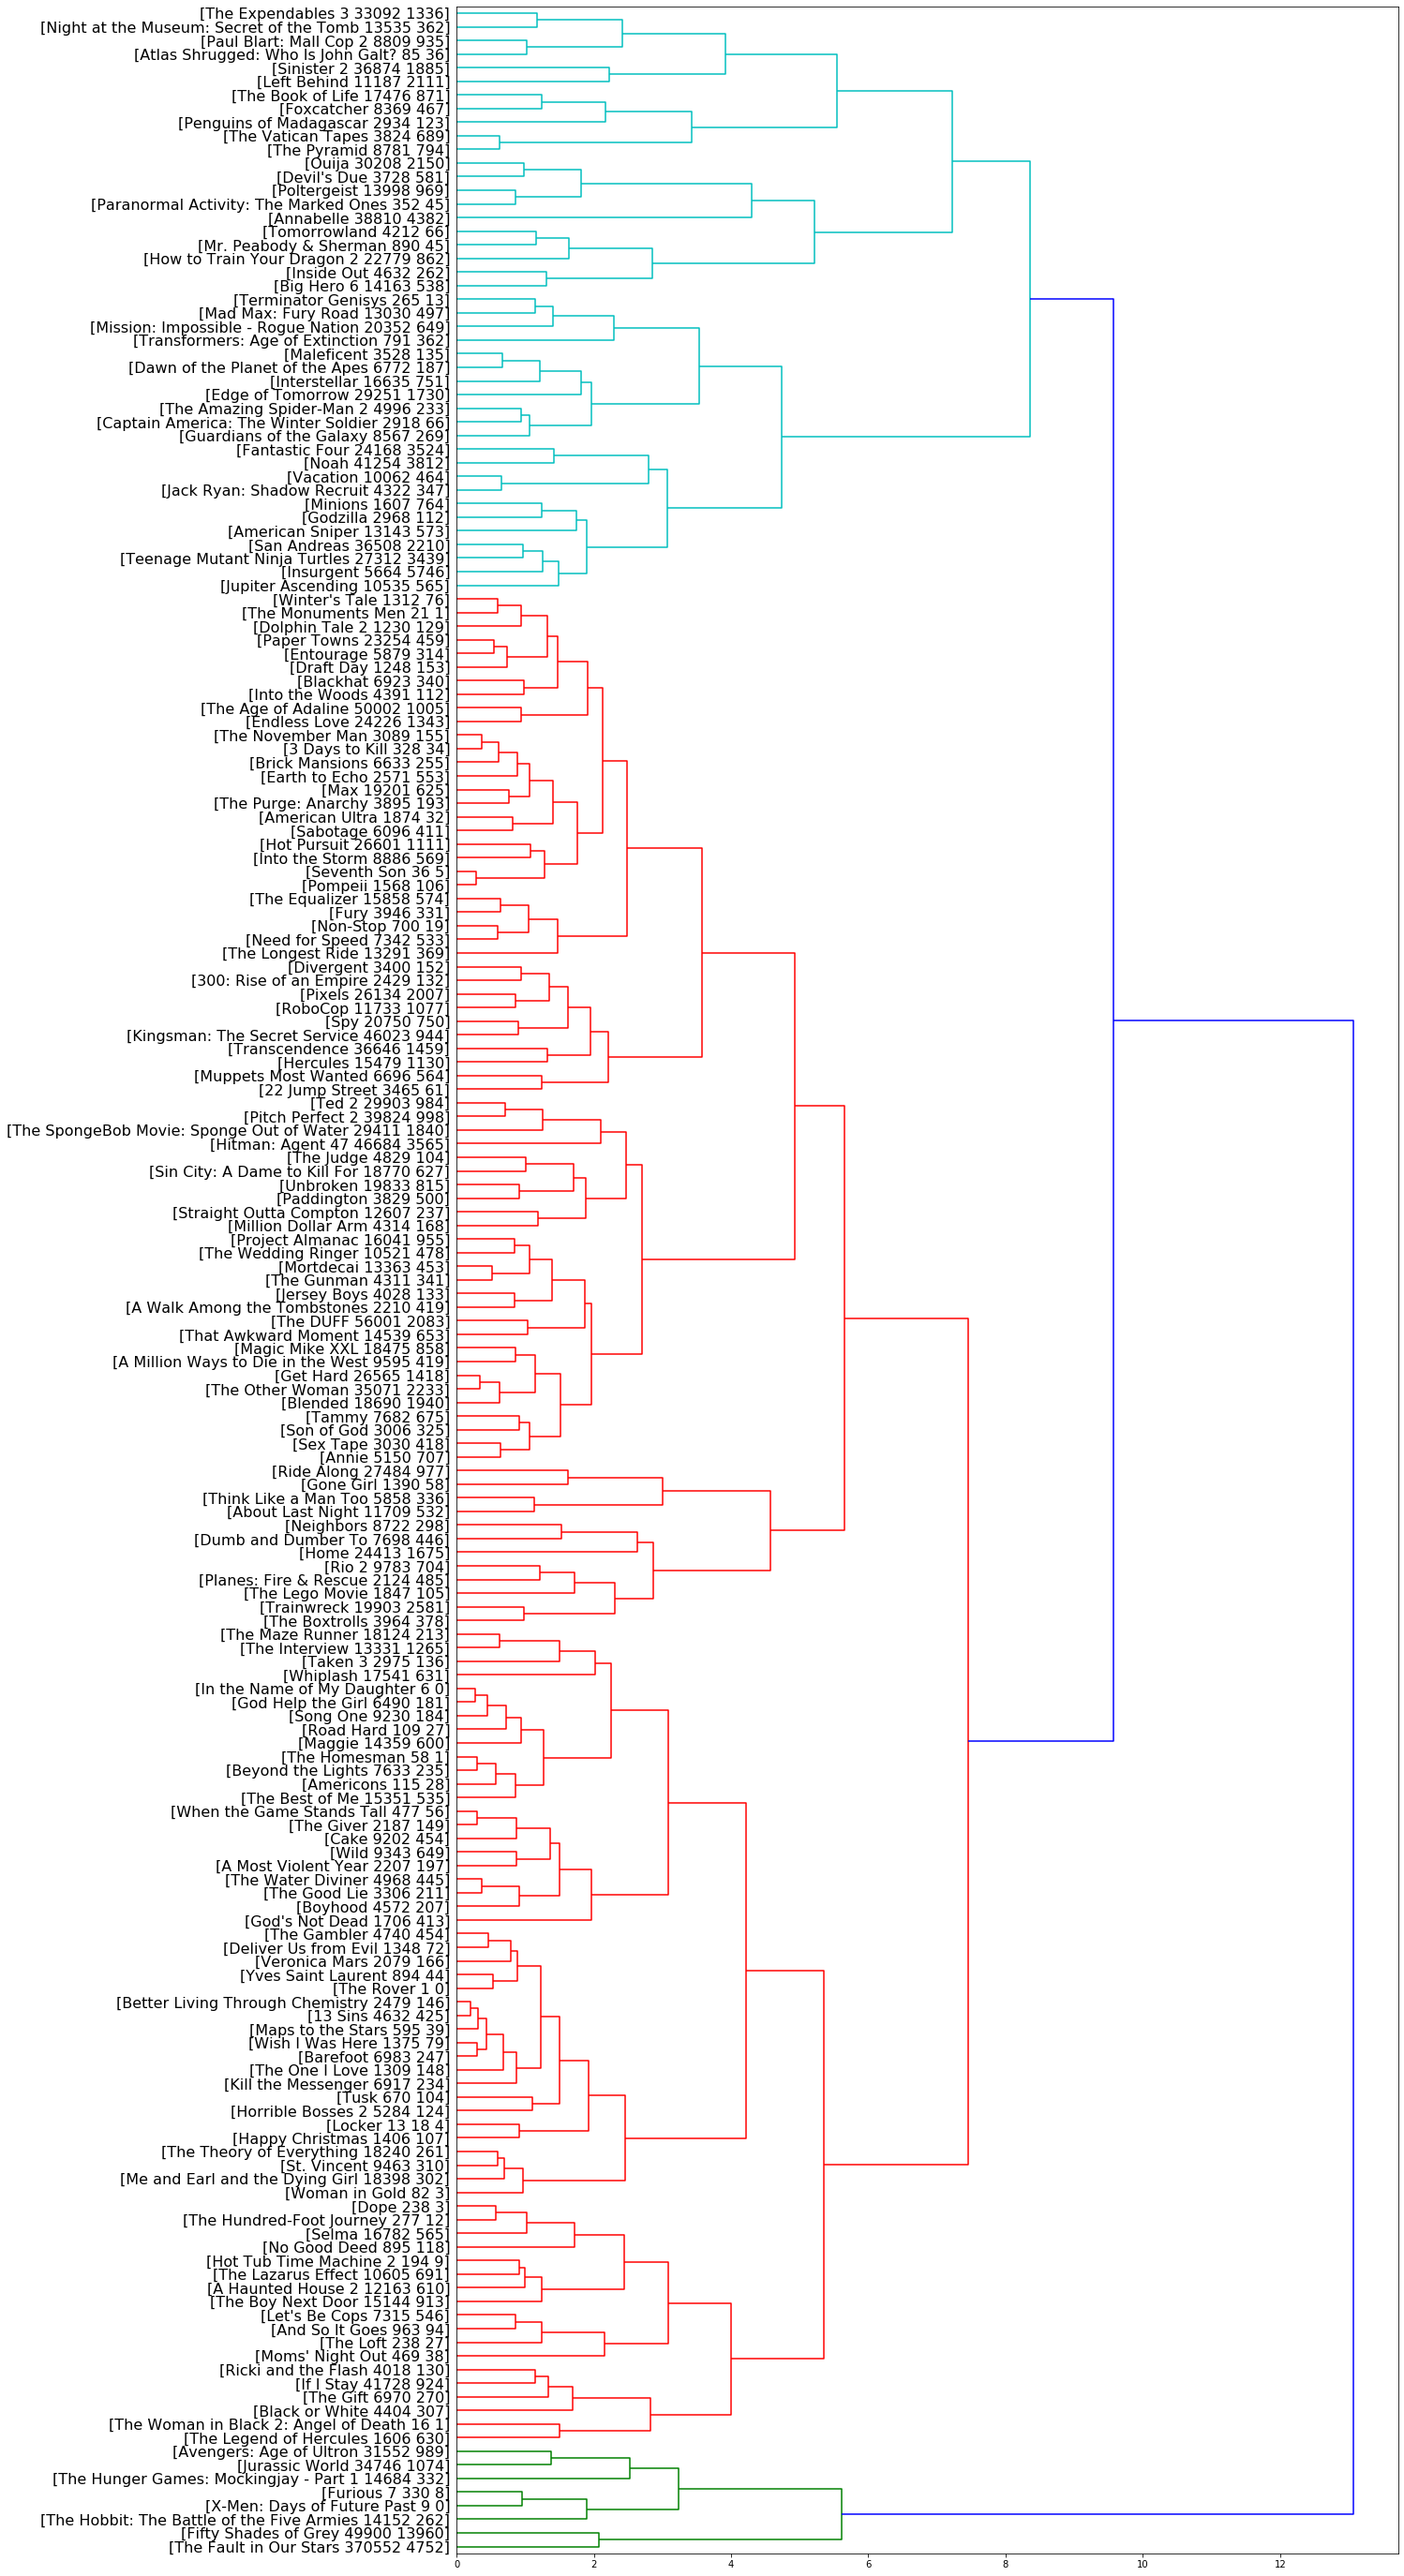

In [54]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['Movie'][id], int(float(data['Likes'][id])), int(float(data['Dislikes'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =16, orientation = 'right')

In [55]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.06302998 0.8363128  ... 0.4220981  0.41388789 0.42688883]
 [1.06302998 0.         0.53067499 ... 0.95647595 0.95332956 0.96666327]
 [0.8363128  0.53067499 0.         ... 0.72181373 0.71269557 0.71645388]
 ...
 [0.4220981  0.95647595 0.72181373 ... 0.         0.39710638 0.23630705]
 [0.41388789 0.95332956 0.71269557 ... 0.39710638 0.         0.27716279]
 [0.42688883 0.96666327 0.71645388 ... 0.23630705 0.27716279 0.        ]]


In [56]:
agglom = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 4, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 4, 0, 4, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 3, 3, 1, 1, 0, 3, 1, 2, 1, 1, 3, 0, 1, 1, 1, 1, 1, 3, 0, 0,
       1, 0, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0], dtype=int64)

In [57]:
data['cluster_'] = agglom.labels_
data.head()

,Movie,Year,Ratings,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,cluster_
0,13 Sins,2014.0,6.3,8.0,9130.0,4000000.0,45.0,1.0,0.0,3280543.0,4632.0,425.0,636.0,1120000.0,0
1,22 Jump Street,2014.0,7.1,1.0,192000000.0,50000000.0,3306.0,2.0,2.0,583289.0,3465.0,61.0,186.0,12350000.0,1
2,3 Days to Kill,2014.0,6.2,1.0,30700000.0,28000000.0,2872.0,1.0,0.0,304861.0,328.0,34.0,47.0,483000.0,0
3,300: Rise of an Empire,2014.0,6.3,1.0,106000000.0,110000000.0,3470.0,2.0,0.0,452917.0,2429.0,132.0,590.0,568000.0,1
4,A Haunted House 2,2014.0,4.7,8.0,17300000.0,3500000.0,2310.0,2.0,0.0,3145573.0,12163.0,610.0,1082.0,1923800.0,0


Text(0, 0.5, 'tidak suka')

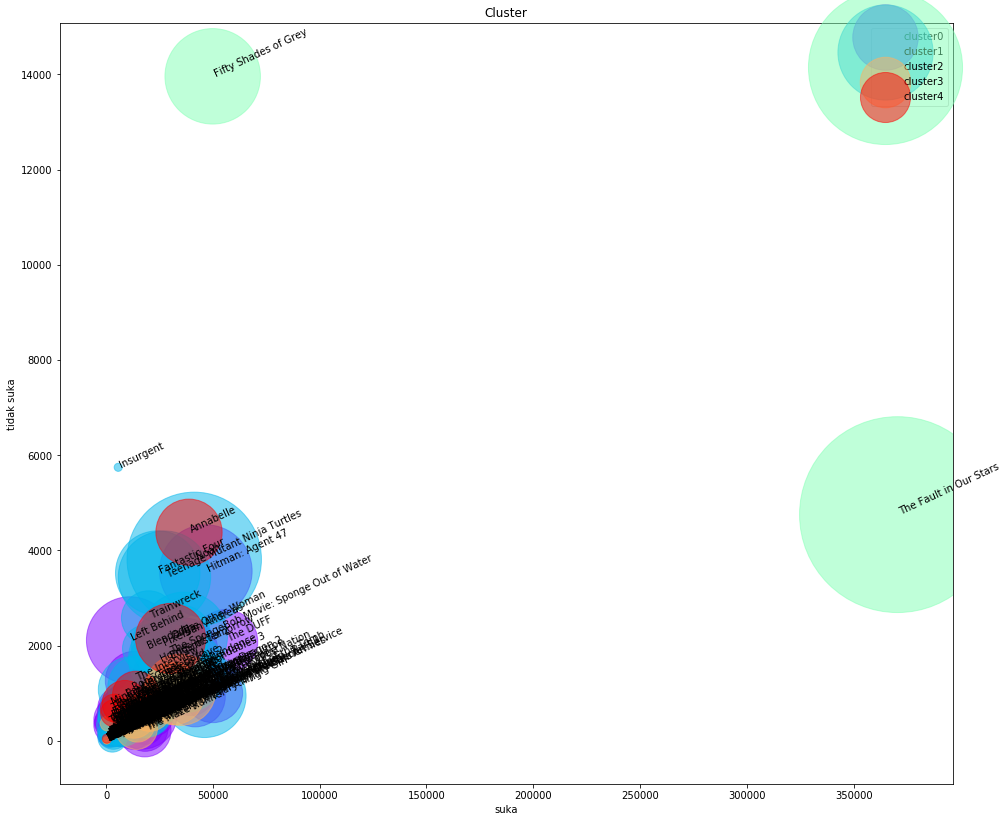

In [58]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data[data.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Likes[i], subset.Dislikes[i], str(subset['Movie'][i]), rotation=25) 
    plt.scatter(subset.Likes, subset.Dislikes, s = subset.Comments*1, color=color, label = 'cluster'+str(label), alpha=0.5)

plt.legend()
plt.title('Cluster')
plt.xlabel('suka')
plt.ylabel('tidak suka')

In [59]:
data.groupby(['cluster_','Movie'])['cluster_'].count()

cluster_  Movie                                    
0         13 Sins                                      1
          3 Days to Kill                               1
          A Haunted House 2                            1
          A Million Ways to Die in the West            1
          A Most Violent Year                          1
          A Walk Among the Tombstones                  1
          About Last Night                             1
          American Ultra                               1
          Americons                                    1
          And So It Goes                               1
          Annie                                        1
          Atlas Shrugged: Who Is John Galt?            1
          Barefoot                                     1
          Better Living Through Chemistry              1
          Beyond the Lights                            1
          Black or White                               1
          Blackhat                  

In [60]:
film = data.groupby(['cluster_','Movie'])['Likes','Dislikes','Views','Comments'].mean()
film

Likes  Dislikes  \
cluster_ Movie                                                           
0        13 Sins                                      4632.0     425.0   
         3 Days to Kill                                328.0      34.0   
         A Haunted House 2                           12163.0     610.0   
         A Million Ways to Die in the West            9595.0     419.0   
         A Most Violent Year                          2207.0     197.0   
         A Walk Among the Tombstones                  2210.0     419.0   
         About Last Night                            11709.0     532.0   
         American Ultra                               1874.0      32.0   
         Americons                                     115.0      28.0   
         And So It Goes                                963.0      94.0   
         Annie                                        5150.0     707.0   
         Atlas Shrugged: Who Is John Galt?              85.0      36.0   
         Barefoot                                     6983.0     247.0   
         Better Living Through Chemistry              2479.0     146.0   
         Beyond the Lights                            7633.0     235.0   
         Black or White                               4404.0     307.0   
         Blackhat                                     6923.0     340.0   
         Boyhood                                      4572.0     207.0   
         Brick Mansions                               6633.0     255.0   
         Cake                                         9202.0     454.0   
         Deliver Us from Evil                         1348.0      72.0   
         Dolphin Tale 2                               1230.0     129.0   
         Dope                                          238.0       3.0   
         Draft Day                                    1248.0     153.0   
         Dumb and Dumber To                           7698.0     446.0   
         Earth to Echo                                2571.0     553.0   
         Endless Love                                24226.0    1343.0   
         Entourage                                    5879.0     314.0   
         Foxcatcher                                   8369.0     467.0   
         God Help the Girl                            6490.0     181.0   
...                                                      ...       ...   
1        The Amazing Spider-Man 2                     4996.0     233.0   
         The Boxtrolls                                3964.0     378.0   
         The Equalizer                               15858.0     574.0   
         The Judge                                    4829.0     104.0   
         The Lego Movie                               1847.0     105.0   
         The Other Woman                             35071.0    2233.0   
         The SpongeBob Movie: Sponge Out of Water    29411.0    1840.0   
         Tomorrowland                                 4212.0      66.0   
         Trainwreck                                  19903.0    2581.0   
         Transcendence                               36646.0    1459.0   
         Unbroken                                    19833.0     815.0   
2        Fifty Shades of Grey                        49900.0   13960.0   
         The Fault in Our Stars                     370552.0    4752.0   
3        Avengers: Age of Ultron                     31552.0     989.0   
         Furious 7                                     330.0       8.0   
         Jurassic World                              34746.0    1074.0   
         Mad Max: Fury Road                          13030.0     497.0   
         Mission: Impossible - Rogue Nation          20352.0     649.0   
         Terminator Genisys                            265.0      13.0   
         The Hobbit: The Battle of the Five Armies   14152.0     262.0   
         The Hunger Games: Mockingjay - Part 1       14684.0     332.0   
         Transformers: Age of Extinction               791.

Text(0, 0.5, 'tidak suka')

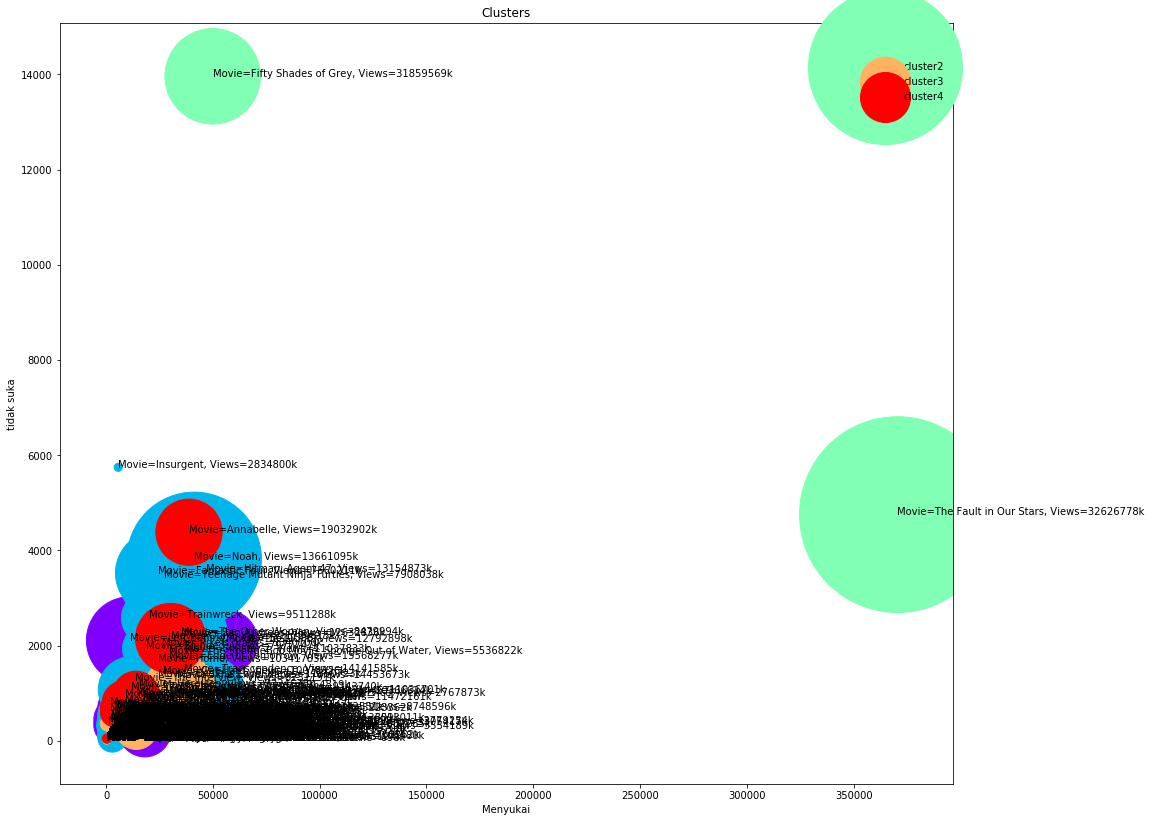

In [61]:
plt.figure(figsize=(16,14))
for color, label in zip(colors, cluster_labels):
    subset = film.loc[(label,),]
    for i in subset.index:
        plt.text(subset.Likes[i], subset.Dislikes[i], 'Movie='+(i) + ', Views='+str(int(subset.loc[i][2]))+'k')
    plt.scatter(subset.Likes, subset.Dislikes, s = subset.Comments*1, color=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('Menyukai')
plt.ylabel('tidak suka')